# Libraries

In [ ]:
import sklearn
import numpy as np
import os
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import Imputer
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
%matplotlib inline

import pandas as pd 
import random
import math
import numpy as np 
import seaborn as sns
import pylab as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score # Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from collections import Counter
from patsy import dmatrices
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Explore the dataset

In [ ]:
pd.set_option('display.max_columns', None)

customers = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

customers.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3.0,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10.0,770.0,4,3080,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0.0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732.0,437.0,5,2185,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0.0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89.0,795.0,4,3180,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0.0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3.0,755.0,4,3020,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0.0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5.0,425.0,4,1700,0.0


In [ ]:
customers.shape

(18105, 53)

We will replace the values that we don't have with NaN. This way it will be easier to handle the data.

In [ ]:
customers = customers.replace('missing', np.NaN)
customers = customers.replace('na', np.NaN)
customers = customers.replace('#VALUE!', np.NaN)
customers = customers.replace('N/A', np.NaN)

test = test.replace('missing', np.NaN)
test = test.replace('na', np.NaN)
test = test.replace('#VALUE!', np.NaN)
test = test.replace('N/A', np.NaN)

We can see that mvar47 is categorical and we want it to be numerical. We will identify 0 as Charge and 1 as Lending.

In [ ]:
customers['default_ind'].value_counts()

0.0    13289
1.0     4815
Name: default_ind, dtype: int64

71.26% are default_ind 0.

Convert object dtype to float.

In [ ]:
customers = customers.apply(pd.to_numeric, errors ='ignore')
test = test.apply(pd.to_numeric, errors ='ignore')

customers["mvar47"] = customers["mvar47"].astype("category").cat.codes
test["mvar47"] = test["mvar47"].astype("category").cat.codes

# get dummies
# customers = pd.get_dummies(customers, columns = ['mvar47'])

# numeric for all except mvar47
# mvar47: C and L make sure it is categorical

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  18105 non-null  int64  
 1   mvar1            17315 non-null  float64
 2   mvar2            16683 non-null  float64
 3   mvar3            17989 non-null  float64
 4   mvar4            17989 non-null  float64
 5   mvar5            17989 non-null  float64
 6   mvar6            13805 non-null  float64
 7   mvar7            16447 non-null  float64
 8   mvar8            13805 non-null  float64
 9   mvar9            15663 non-null  float64
 10  mvar10           17989 non-null  float64
 11  mvar11           7467 non-null   float64
 12  mvar12           14948 non-null  float64
 13  mvar13           15292 non-null  float64
 14  mvar14           18105 non-null  int64  
 15  mvar15           10638 non-null  float64
 16  mvar16           13908 non-null  float64
 17  mvar17      

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18198 entries, 0 to 18197
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  18198 non-null  int64  
 1   mvar1            17354 non-null  float64
 2   mvar2            16758 non-null  float64
 3   mvar3            18076 non-null  float64
 4   mvar4            18076 non-null  float64
 5   mvar5            18076 non-null  float64
 6   mvar6            13649 non-null  float64
 7   mvar7            16410 non-null  float64
 8   mvar8            13644 non-null  float64
 9   mvar9            15552 non-null  float64
 10  mvar10           18076 non-null  float64
 11  mvar11           7777 non-null   float64
 12  mvar12           14845 non-null  float64
 13  mvar13           14950 non-null  float64
 14  mvar14           18198 non-null  int64  
 15  mvar15           10718 non-null  float64
 16  mvar16           13754 non-null  float64
 17  mvar17      

## Outliers

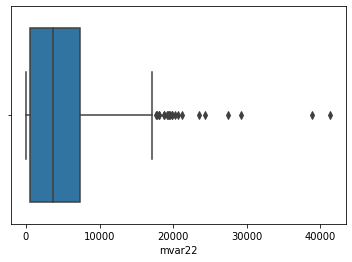

In [ ]:
import seaborn as sns
sns.boxplot(x = customers['mvar22']) #mvar2 has many outliers .. ?

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
customers.shape

(18105, 53)

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(customers))

# threshold is 3
# print(np.where(z > 3))

Q1 = customers.quantile(0.05)
Q3 = customers.quantile(0.95)
IQR = Q3 - Q1
# print(IQR)

customers = customers[~((customers < (Q1 - 2 * IQR)) |(customers > (Q3 + 2 * IQR))).any(axis=1)]

## Nan Values

In [ ]:
nan_cols = customers.isnull().sum()
nan_cols[nan_cols>0]

mvar1            771
mvar2           1334
mvar3            115
mvar4            115
mvar5            115
mvar6           3930
mvar7           1508
mvar8           3930
mvar9           2242
mvar10           115
mvar11         10015
mvar12          2892
mvar13          2613
mvar15          6911
mvar16          3834
mvar17          3254
mvar18          3030
mvar19             1
mvar20           116
mvar21          4679
mvar22          6360
mvar23          8735
mvar24          3877
mvar25          1542
mvar26          2207
mvar27          2787
mvar28           116
mvar29           116
mvar30          7720
mvar31         12086
mvar32          1542
mvar33           408
mvar34           116
mvar35          7339
mvar36           662
mvar37          1542
mvar38           116
mvar39          1266
mvar40         13329
mvar41         11576
mvar42           413
mvar43           183
mvar44          1605
mvar45          8938
mvar46          4717
mvar48             1
mvar49             1
mvar50       

'Number of columns with NaN elements: 50'


Percentage of NaN elements in each column in descending order:



mvar40         79.790482
mvar31         72.349596
mvar41         69.296618
mvar11         59.952110
mvar45         53.504939
mvar23         52.289734
mvar30         46.213708
mvar35         43.932954
mvar15         41.370847
mvar22         38.072433
mvar46         28.237055
mvar21         28.009578
mvar6          23.525890
mvar8          23.525890
mvar24         23.208620
mvar16         22.951212
mvar17         19.479198
mvar18         18.138282
mvar12         17.312182
mvar27         16.683628
mvar13         15.642023
mvar9          13.421131
mvar26         13.211613
mvar44          9.607902
mvar25          9.230769
mvar32          9.230769
mvar37          9.230769
mvar7           9.027237
mvar2           7.985633
mvar39          7.578569
mvar50          4.621371
mvar51          4.621371
mvar1           4.615385
mvar36          3.962885
mvar42          2.472314
mvar33          2.442383
mvar43          1.095480
mvar20          0.694403
mvar34          0.694403
mvar28          0.694403


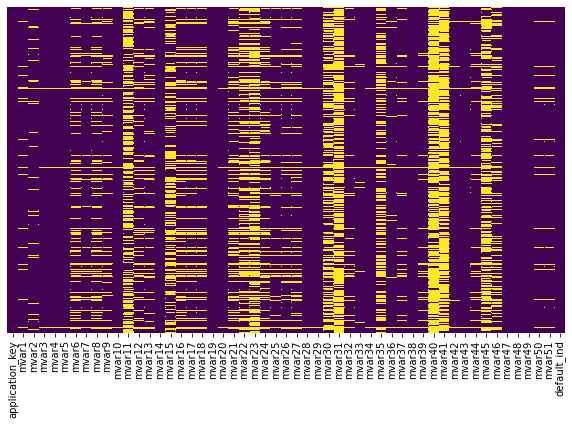

In [ ]:
def check_nan(df: pd.DataFrame) -> None:
    nan_cols  = df.isna().mean()*100 
    display(f'Number of columns with NaN elements: {len(nan_cols[nan_cols>0])}')
    print("\nPercentage of NaN elements in each column in descending order:\n")
    display(nan_cols[nan_cols>0].sort_values(ascending=False))
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isna(),yticklabels=False,cmap='viridis', cbar = False)
    plt.show();
check_nan(customers)

In [ ]:
# Drop all variables with more than 40% values missing: 40 31 41 11 23 45 35 30 15

customers.drop(['mvar40','mvar31', 'mvar41', 'mvar11', 'mvar45', 'mvar23', 'mvar30', 'mvar35', 'mvar15'], axis = 1, inplace = True)
test.drop(['mvar40','mvar31', 'mvar41', 'mvar11', 'mvar45', 'mvar23', 'mvar30', 'mvar35', 'mvar15'], axis = 1, inplace = True)

In [ ]:
customers.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar12,mvar13,mvar14,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar32,mvar33,mvar34,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,6423.0,3067.0,123875,1.0,1.0,1.0,3.0,3.0,94.78,8987.18,72.25,1462.0,4532.0,2890.0,61.0,4532.0,625.0,1.1667,1.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0,10.0,770.0,4.0,3080.0,0.0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,765.0,1931.0,42613,0.0,0.0,0.0,0.0,0.0,74.25,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,169.0,0.4167,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,NaN,1,732.0,437.0,5.0,2185.0,1.0
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,76109,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,NaN,25.0833,0.0,1.0,NaN,1.0,0.0,0.00000,1.0,1.00000,0.0,0,89.0,795.0,4.0,3180.0,1.0
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,0.0,0.0,84235,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,1308.0,2525.0,791.0,91.0,5992.0,215.0,10.3333,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,0.0,1,3.0,755.0,4.0,3020.0,0.0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,2257.0,27815.0,123875,0.0,0.0,0.0,0.0,0.0,20.51,796.67,28.72,801.0,2281.0,2281.0,487.0,2707.0,158.0,0.9167,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,NaN,1,5.0,425.0,4.0,1700.0,0.0


Should we do something about the empty rows ??? 

In [ ]:
nan_rows = customers.isnull().sum(axis=1) # Rows with missing values

row_indx = nan_rows[nan_rows > 35].index.tolist() # Get indexes of rows with more than 25 values missing

customers = customers.drop(row_indx) # Drop


In [ ]:
# Drop variables with p-val > 0.05 for LOGISTIC REGRESSION

customers.drop(['mvar3','mvar4', 'mvar6', 'mvar7', 'mvar8', 'mvar12', 'mvar14', 'mvar16', 'mvar17', 'mvar20', 'mvar26', 'mvar27', 'mvar39'], axis = 1, inplace = True)
test.drop(['mvar3','mvar4', 'mvar6', 'mvar7', 'mvar8', 'mvar12', 'mvar14', 'mvar16', 'mvar17', 'mvar20', 'mvar26', 'mvar27', 'mvar39'], axis = 1, inplace = True)


## Correlation

Now we evaluate if the columns in this dataset are strongly correlated.

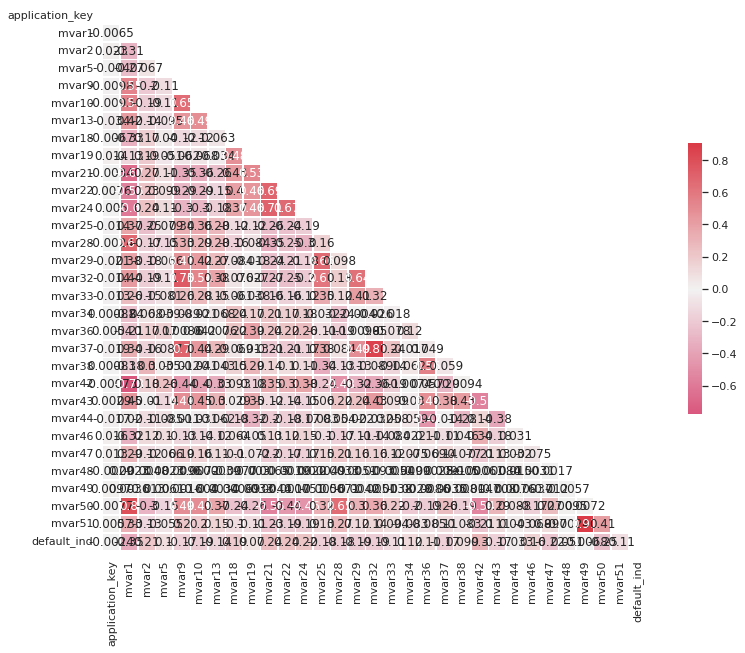

In [ ]:
def colinearity(data):
    plt.figure(figsize=(15, 10))
    sns.set(style='white')
    mask=np.triu(np.ones_like(data.corr(), dtype=bool))
    cmap=sns.diverging_palette(0, 10, as_cmap=True)
    sns.heatmap(data.corr(),mask=mask,cmap=cmap,center=0,
              square=True,annot=True,linewidths=0.5,cbar_kws={'shrink': 0.5});
colinearity(customers)

We see that there are some highly correlated columns. We do not need these for our model.

We want the dataset to contain less than xx% correlated columns, and we also want to remove as few columns as we can. 

In [ ]:
def eliminate_correlated_columns(dataframe, threshold):
    # Create correlation matrix
    corr_matrix = dataframe.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
    )

    # Find index of feature columns with correlation greater than threshold
    to_drop = [
        column for column in upper.columns if any(upper[column] > threshold)
    ]

    # Drop features
    dataframe = dataframe.drop(dataframe[to_drop], axis=1)

    return dataframe

customers = eliminate_correlated_columns(customers, threshold = 0.7)

In [ ]:
customers.head()

,application_key,mvar1,mvar2,mvar5,mvar9,mvar10,mvar13,mvar18,mvar19,mvar21,mvar22,mvar25,mvar28,mvar29,mvar33,mvar34,mvar36,mvar38,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,default_ind
0,230032,1696.0,1.6541,0.0,40369.0,18414.0,3067.0,1.0,3.0,94.78,8987.18,1462.0,61.0,4532.0,1.1667,1.0,8.0,4.0,10.0,0.63899,0.0,0,10.0,770.0,0.0
1,230033,1846.0,0.8095,0.0,18234.0,13664.0,1931.0,0.0,0.0,74.25,953.06,1028.0,30386.0,2281.0,0.4167,0.0,8.0,2.0,13.0,0.63836,NaN,1,732.0,437.0,1.0
2,230034,1745.0,0.4001,0.0,NaN,2536.0,NaN,NaN,0.0,NaN,NaN,NaN,669.0,4623.0,25.0833,0.0,1.0,1.0,1.0,1.00000,0.0,0,89.0,795.0,1.0
3,230035,1739.0,0.2193,0.0,20316.0,37013.0,0.0,0.0,0.0,NaN,0.00,1308.0,91.0,5992.0,10.3333,0.0,3.0,2.0,3.0,0.53241,0.0,1,3.0,755.0,0.0
4,230036,1787.0,0.0118,0.0,7987.0,4696.0,27815.0,0.0,0.0,20.51,796.67,801.0,487.0,2707.0,0.9167,0.0,2.0,2.0,1.0,0.92665,NaN,1,5.0,425.0,0.0


## Standarize

Logistic regressions and tree-based algorithms such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models.

For distance-based models, standardization is performed to prevent features with wider ranges from dominating the distance metric. (KNN, SVM, clustering, PCA)

https://builtin.com/data-science/when-and-why-standardize-your-data

In [ ]:
cols = list(customers.columns)
cols.remove('application_key')
cols.remove('default_ind')
print(cols)

['mvar1', 'mvar2', 'mvar5', 'mvar9', 'mvar10', 'mvar13', 'mvar18', 'mvar19', 'mvar21', 'mvar22', 'mvar25', 'mvar28', 'mvar29', 'mvar33', 'mvar34', 'mvar36', 'mvar38', 'mvar43', 'mvar44', 'mvar46', 'mvar47', 'mvar48', 'mvar49']


In [ ]:
#define predictor variable columns
customers_x = customers[cols]

#standardize the values for each predictor variable
customers[cols] = (customers_x-customers_x.mean())/customers_x.std()

In [ ]:
customers.shape

(16655, 25)

In [ ]:
customers.head()

,application_key,mvar1,mvar2,mvar5,mvar9,mvar10,mvar13,mvar18,mvar19,mvar21,mvar22,mvar25,mvar28,mvar29,mvar33,mvar34,mvar36,mvar38,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,default_ind
0,230032,-0.645124,0.636280,-0.217156,0.159282,-0.214250,-0.477995,1.584403,1.451267,1.184694,1.344706,-0.278639,-0.684944,-0.319633,-0.779296,1.687213,0.466540,0.027433,0.579652,-0.315331,-0.256672,-0.886789,-0.492230,1.173207,0.0
1,230033,0.958275,-0.067539,-0.217156,-0.343053,-0.325666,-0.527165,-0.386552,-0.560056,0.574540,-0.880772,-0.612710,1.503271,-1.021367,-0.877586,-0.361925,0.466540,-0.547174,1.082462,-0.317944,NaN,1.127047,0.159750,-1.137356,1.0
2,230034,-0.121347,-0.408699,-0.217156,NaN,-0.586684,NaN,NaN,-0.560056,NaN,NaN,NaN,-0.641072,-0.291265,2.355066,-0.361925,-1.085060,-0.834478,-0.928776,1.181796,-0.256672,-0.886789,-0.420892,1.346673,1.0
3,230035,-0.185483,-0.559363,-0.217156,-0.295803,0.222008,-0.610745,-0.386552,-0.560056,NaN,-1.144773,-0.397180,-0.682780,0.135512,0.422022,-0.361925,-0.641746,-0.547174,-0.593570,-0.757324,-0.256672,1.127047,-0.498551,1.069128,0.0
4,230036,0.327605,-0.732276,-0.217156,-0.575599,-0.536020,0.593183,-0.386552,-0.560056,-1.022619,-0.924093,-0.787444,-0.654205,-0.888565,-0.812060,-0.361925,-0.863403,-0.547174,-0.928776,0.877609,NaN,1.127047,-0.496745,-1.220620,0.0


In [ ]:
import pandas as pd
from sklearn import preprocessing

x = customers.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
customers = pd.DataFrame(x_scaled)

## Fill na with mean

In [ ]:
# fill missing values with the mean of the column
customers.fillna(customers.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
test.head()

,application_key,mvar1,mvar2,mvar5,mvar9,mvar10,mvar13,mvar18,mvar19,mvar21,mvar22,mvar24,mvar25,mvar28,mvar29,mvar32,mvar33,mvar34,mvar36,mvar37,mvar38,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,578069,1719.0,0.6174,0.0,10729.000000,307.0,0.00000,0.000000,0.0,56.57933,6125.000000,13.330000,1399.000000,0.0,3650.0,184.000000,5.1667,0.0,3.0,3.00000,2.0,0.545450,2.0,0.91837,0.0,0,3247.0,554.0,4.0,2216.0
1,578070,1795.0,0.2051,0.0,80519.000000,18099.0,455.00000,0.000000,0.0,25.05000,2385.710000,0.000000,1440.000000,760.0,7330.0,852.000000,3.0833,0.0,2.0,13.00000,4.0,0.172410,4.0,0.94563,0.0,0,18.0,554.0,4.0,2216.0
2,578071,1742.0,0.5082,0.0,1189.000000,1185.0,1453.00000,0.000000,0.0,20.34000,33.330000,0.330000,2716.000000,669.0,14478.0,625.000000,0.5833,0.0,1.0,3.00000,1.0,0.647060,1.0,0.97054,0.0,0,11.0,404.0,4.0,1616.0
3,578072,1685.0,0.2595,0.0,35173.978395,3354.0,18726.74194,0.261261,0.0,56.57933,4249.930205,69.360007,1862.173942,0.0,2373.0,497.141363,0.4167,0.0,6.0,4.59032,2.0,0.857140,1.0,1.00000,0.0,0,32.0,528.0,4.0,2112.0
4,578073,1666.0,1.2678,0.0,35173.978395,570.0,18726.74194,0.000000,0.0,11.53800,1153.850000,69.360007,0.000000,0.0,1551.0,0.000000,0.1667,0.0,1.0,0.00000,2.0,0.331128,0.0,0.99617,0.0,1,89.0,419.0,4.0,1676.0


In [ ]:
type(customers)

pandas.core.frame.DataFrame

## PCA

In [ ]:
pd.set_option('display.max_columns', None)

customers = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

customers.head()

In [ ]:

X = customers.drop(columns=['default_ind', 'application_key'], axis = 1)
y = customers.default_ind

X.shape, y.shape

((18105, 51), (18105,))

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14484, 51), (3621, 51), (14484,), (3621,))

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

ValueError: ignored

In [ ]:
X_train.shape

(14484, 51)

## Separate into X and y 

In [ ]:
#X = customers.drop('default_ind', axis=1) 

X = customers.drop(columns=['default_ind', 'application_key'])
y = customers.default_ind

X.shape, y.shape

((83000, 51), (83000,))

## Calculate VIF

In [ ]:
from statsmodels.formula.api import ols
def calculate_vif(dataframe):
    # Create an empty list to store the VIFs
    vifs = []

    # Create a dataframe without the constant columns
    dataframe = dataframe.dropna(axis=1, how='all')

    # For each column, calculate the VIF and append it to the list
    for column in dataframe:
        formula = '{} ~ {} + 1'.format(column, ' + '.join(dataframe.columns.difference([column])))
        result = ols(formula, dataframe).fit()
        vifs.append(round(result.rsquared, 2))

    # Return the list of VIFs
    return vifs

print(calculate_vif(customers))

## Extra

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =22)
clf = LazyClassifier( verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print()
print(models)

100%|██████████| 29/29 [00:19<00:00,  1.45it/s]


Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


# ML models

## Decision Tree

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66400, 51), (16600, 51), (66400,), (16600,))

In [ ]:
# undersampling
from imblearn.under_sampling import NearMiss
ns =NearMiss(ratio='not minority')

X_train, y_train = ns.fit_sample(X_train, y_train)
print(pd.DataFrame(y_train).value_counts())
X_test, y_test = ns.fit_sample(X_test, y_test)
print(pd.DataFrame(y_test).value_counts())

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [ ]:
# Cross Validation for the model
dt_brforetune_cv_scores  = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10, n_jobs=-1)
mean_dt_brforetune_cv_score = dt_brforetune_cv_scores.mean()
print("The cross-validation accuracy score for untuned decisionTree model after a 10 fold cross validation:",  mean_dt_brforetune_cv_score)

In [ ]:
# HyperParameter Tuning
print(dt.get_params())
params_dt = {
            'max_depth': [100,600],
            'min_samples_leaf':[50,100,1000], #100/1000/5000
            'max_features': [4,5, 6] #4/6/5,
             }
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring="accuracy", cv=10, n_jobs=-1)
grid_dt.fit(X_train,y_train)

In [ ]:
best_hyperparams = grid_dt.best_params_
print("Best hyperparameters: \n", best_hyperparams )
dt_aftertune_cv_scores = grid_dt.best_score_
print("The cross-validation accuracy score for tuned decisionTree model after a 10 fold cross validation:\n",  dt_aftertune_cv_scores)
best_dt_model = grid_dt.best_estimator_

In [ ]:
best_dt_fit_for_train_data = cross_val_score(estimator=best_dt_model, X=X_train, y=y_train, cv=10, n_jobs=-1).mean()
print(best_dt_fit_for_train_data)
best_dt_fit_for_test_data = cross_val_score(estimator=best_dt_model, X=X_test, y=y_test, cv=10, n_jobs=-1).mean()
print(best_dt_fit_for_test_data)

In [ ]:
y_pred = dt.predict(test.drop(columns=['application_key']))

In [ ]:
test["preds"] = y_pred
final_sub = test[["application_key", "preds"]]
final_sub=final_sub.set_index('application_key')
final_sub.to_csv("MadrasAnalytics_3.csv", header = False)

## AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

NameError: ignored

In [ ]:
y_pred = model.predict(test.drop(columns=['application_key', 'preds']))
test["preds"] = y_pred
final_sub = test[["application_key", "preds"]]
final_sub=final_sub.set_index('application_key')
final_sub.to_csv("MadrasAnalytics_10_adb.csv", header = False)

NameError: ignored

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

NameError: ignored

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=700)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

ValueError: ignored

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
y_pred = clf.predict(test.drop(columns=['application_key']))
test["preds"] = y_pred
final_sub = test[["application_key", "preds"]]
final_sub=final_sub.set_index('application_key')
final_sub.to_csv("MadrasAnalytics_7.csv", header = False)

## XG Boost

51.67%

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

### Parameter tuning

In [ ]:
n_jobs = 16

def tunefit(model, X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    '''XGBoost hyper-parameter tuning and report generation

    Parameters
    ----------
        model: A xgboost.sklearn.XGBClassifier object
        dtrain: Dataframe to train the model on
        dtest: Dataframe to cross evaluate the model on
        features: List of features to be used for training
        useTrainCV: Whether to use cross-validation first
        cv_folds: k of k-fold cross-validation
        early_stopping_rounds: rounds to stop after no improvement

    Returns
    -------
        model: trained and tuned XGBoost model
        cv_result: cross-validation history, if useTrainCV is True
    '''

    if useTrainCV:
        print("Training with Cross-Validation")
        xgb_param = model.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        xgtest = xgb.DMatrix(X_test)
        
        print("Begin Cross-validation Grid Search...")
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=5, metrics='map', early_stopping_rounds=early_stopping_rounds)
        
        print("Cross-validation Done. Setting parameters...")
        print("Best n_estimators = {}".format(cvresult.shape[0]))
        model.set_params(n_estimators=cvresult.shape[0])
        
        print("Saving tuned model...")
        joblib.dump(model, "xgb-tuned.pk")
        
    #Fit the modelorithm on the data
    print("Training the model on given parameters...")
    model.fit(X_train, y_train,eval_metric='auc')
    
    print("Saving trained model...")
    joblib.dump(model, "xgb-tuned-trained.pk")
    
    # Predict training set
    print("\nPredicting the train set...")
    dtrain_predictions = model.predict(X_train)
    dtrain_predprob = model.predict_proba(X_train)[:,1]
        
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    #Predict on testing data:
    print("Predicting the test set...")
    predprob = model.predict_proba(X_test)[:,1]
    print('AUC Score (Test): %f' % metrics.roc_auc_score(y_test, predprob))
    
    # Generating full report on test set
    print("\nModel Report on Test Set")
    y_pred = model.predict(X_test)
    conf_mat=confusion_matrix(y_test,y_pred, [0,1])
    plot_confusion_matrix(conf_mat,classes=[0,1],
                      title='XGBoost | Confusion Matrix')
    print(classification_report(y_test, y_pred))

    # Feature Importance            
    plot_importance(model)
    plt.show()
    
    if useTrainCV:
        return model, cvresult
    return model

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

model = XGBClassifier(
        learning_rate = 0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=n_jobs,
        scale_pos_weight=1,
        seed=42,
        silent=False)

model, cv_result = tunefit(model, X_train._get_numeric_data(), X_test._get_numeric_data(), y_train, y_test,cv_folds=10)

Training with Cross-Validation
Begin Cross-validation Grid Search...


XGBoostError: ignored

In [ ]:
# Tune max depth & min child weight


In [ ]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [ ]:
xgb_model_mpg = xgb.XGBClassifier(max_depth= 3, n_estimators=100, eta=0.3)

In [ ]:
xgb_model_mpg.fit(X, y)

ValueError: ignored

In [ ]:
res = xgb_model_mpg.predict(test.drop('application_key', axis=1))

# res = xgb_model_mpg.predict(test.drop(columns=['application_key', 'preds']))

In [ ]:
probs = xgb_model_mpg.predict_proba(test.drop('application_key', axis=1))
# probs = xgb_model_mpg.predict_proba(test.drop(columns=['application_key', 'preds']))

In [ ]:
# test["preds"] = probs[:, 1]

test["preds"] = res
final_sub = test[["application_key", "preds"]]
final_sub=final_sub.set_index('application_key')
final_sub.to_csv("MadrasAnalytics_10.csv", header = False)

## Logistic regression

NOT GOOD SCORE!!

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66400, 51), (16600, 51), (66400,), (16600,))

In [ ]:
logreg=LogisticRegression(max_iter=2000)

NameError: ignored

In [ ]:
model = logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
y_prob=logreg.predict_proba(X_test)

accuracy = sum(y_pred==y_test)/y_pred.shape[0] * 100
print('Accuracy: ', round(accuracy, 2), '%')

In [ ]:
test.drop(columns=['application_key', 'preds']).info()

In [ ]:
test['preds'] = ""

In [ ]:
y_pred = logreg.predict(test.drop(columns=['application_key', 'preds']))
y_prob=logreg.predict_proba(test.drop(columns=['application_key', 'preds']))

test["preds"] = y_pred
final_sub = test[["application_key", "preds"]]
final_sub=final_sub.set_index('application_key')
final_sub.to_csv("MadrasAnalytics_2.csv", header = False)

Feature importance is defined as a method that allocates a value to an input feature and these values which we are allocated based on how much they are helpful in predicting the target variable.

In [ ]:
from matplotlib import pyplot

In [ ]:
importance = model.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

In [ ]:
# building the model and fitting the data
import statsmodels.api as sm

log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())